In [1]:
# importing the neccessary libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew,norm

import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading the  data
df1=pd.read_excel("D2_file1.xlsx")
df2=pd.read_excel("D2_file2.xlsx")
df3=pd.read_excel("D2_file3.xlsx")
target=pd.read_excel("D2_target.xlsx")

In [3]:
df1.columns

Index(['id', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain', 'Length',
       'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity'],
      dtype='object')

In [4]:
df2.columns

Index(['id', 'Make', 'Model', 'Year'], dtype='object')

In [5]:
df3.columns

Index(['id', 'Kilometer', 'Fuel Type', 'Transmission', 'Location', 'Color',
       'Owner', 'Seller Type'],
      dtype='object')

In [6]:
target.columns

Index(['id', 'Price'], dtype='object')

EXPLORATORY DATA ANALYSIS

In [7]:
df1.shape

(2059, 10)

In [8]:
df2.shape

(2059, 4)

In [9]:
df3.shape

(2059, 8)

In [10]:
target.shape

(2059, 2)

In [11]:
df1.nunique()

id                    2059
Engine                 108
Max Power              335
Max Torque             290
Drivetrain               3
Length                 248
Width                  170
Height                 196
Seating Capacity         6
Fuel Tank Capacity      55
dtype: int64

In [12]:
df2.nunique()

id       2059
Make       33
Model    1050
Year       22
dtype: int64

In [13]:
df3.nunique()

id              2059
Kilometer        847
Fuel Type          9
Transmission       2
Location          77
Color             17
Owner              6
Seller Type        3
dtype: int64

In [14]:
target.nunique()

id       2059
Price     619
dtype: int64

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  2059 non-null   int64  
 1   Engine              1979 non-null   object 
 2   Max Power           1979 non-null   object 
 3   Max Torque          1979 non-null   object 
 4   Drivetrain          1923 non-null   object 
 5   Length              1995 non-null   float64
 6   Width               1995 non-null   float64
 7   Height              1995 non-null   float64
 8   Seating Capacity    1995 non-null   float64
 9   Fuel Tank Capacity  1946 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 161.0+ KB


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2059 non-null   int64 
 1   Make    2059 non-null   object
 2   Model   2059 non-null   object
 3   Year    2059 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 64.5+ KB


In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            2059 non-null   int64 
 1   Kilometer     2059 non-null   int64 
 2   Fuel Type     2059 non-null   object
 3   Transmission  2059 non-null   object
 4   Location      2059 non-null   object
 5   Color         2059 non-null   object
 6   Owner         2059 non-null   object
 7   Seller Type   2059 non-null   object
dtypes: int64(2), object(6)
memory usage: 128.8+ KB


In [18]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      2059 non-null   int64
 1   Price   2059 non-null   int64
dtypes: int64(2)
memory usage: 32.3 KB


In [19]:
df1.isnull().sum()

id                      0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

In [20]:
df1.describe()

,id,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2059.000000,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1030.000000,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,594.526422,442.458507,135.265825,136.073956,0.822170,15.110198
min,1.000000,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,515.500000,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,1030.000000,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1544.500000,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,2059.000000,5569.000000,2220.000000,1995.000000,8.000000,105.000000


In [21]:
# fill missing values using forward filling
df1.ffill(inplace=True)
df1.isnull().sum().sum()

0

In [22]:
df2.isnull().sum()

id       0
Make     0
Model    0
Year     0
dtype: int64

In [23]:
df3.isnull().sum()

id              0
Kilometer       0
Fuel Type       0
Transmission    0
Location        0
Color           0
Owner           0
Seller Type     0
dtype: int64

In [24]:
target.isnull().sum()

id       0
Price    0
dtype: int64

In [25]:
# Checking and removing any duplicates from the data
df1[df1.duplicated()]
df1.drop_duplicates(inplace=True)
df1

,id,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,1,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,2,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,3,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,4,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,5,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...
2054,2055,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,2056,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,2057,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,2058,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


In [26]:
df2[df2.duplicated()]
df2.drop_duplicates(inplace=True)
df2

,id,Make,Model,Year
0,1,Honda,Amaze 1.2 VX i-VTEC,2017
1,2,Maruti Suzuki,Swift DZire VDI,2014
2,3,Hyundai,i10 Magna 1.2 Kappa2,2011
3,4,Toyota,Glanza G,2019
4,5,Toyota,Innova 2.4 VX 7 STR [2016-2020],2018
...,...,...,...,...
2054,2055,Mahindra,XUV500 W8 [2015-2017],2016
2055,2056,Hyundai,Eon D-Lite +,2014
2056,2057,Ford,Figo Duratec Petrol ZXI 1.2,2013
2057,2058,BMW,5-Series 520d Luxury Line [2017-2019],2018


In [27]:
df3[df3.duplicated()]
df3.drop_duplicates(inplace=True)
df3

,id,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type
0,1,87150,Petrol,Manual,Pune,Grey,First,Corporate
1,2,75000,Diesel,Manual,Ludhiana,White,Second,Individual
2,3,67000,Petrol,Manual,Lucknow,Maroon,First,Individual
3,4,37500,Petrol,Manual,Mangalore,Red,First,Individual
4,5,69000,Diesel,Manual,Mumbai,Grey,First,Individual
...,...,...,...,...,...,...,...,...
2054,2055,90300,Diesel,Manual,Surat,White,First,Individual
2055,2056,83000,Petrol,Manual,Ahmedabad,White,Second,Individual
2056,2057,73000,Petrol,Manual,Thane,Silver,First,Individual
2057,2058,60474,Diesel,Automatic,Coimbatore,White,First,Individual


In [28]:
target[target.duplicated()]
target.drop_duplicates(inplace=True)
target

,id,Price
0,1,505000
1,2,450000
2,3,220000
3,4,799000
4,5,1950000
...,...,...
2054,2055,850000
2055,2056,275000
2056,2057,240000
2057,2058,4290000


In [29]:
data_merge= pd.merge(df1,df2,on=['id'])

In [30]:
data_merge.shape

(2059, 13)

In [31]:
data_merge1 = pd.merge(data_merge,df3,on=['id'])

In [32]:
data_merge1.shape

(2059, 20)

In [33]:
data =  pd.merge(data_merge1,target,on=['id'])

In [34]:
data.shape

(2059, 21)

In [35]:
data.head()

,id,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,...,Model,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Price
0,1,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0,...,Amaze 1.2 VX i-VTEC,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,505000
1,2,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0,...,Swift DZire VDI,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,450000
2,3,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0,...,i10 Magna 1.2 Kappa2,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,220000
3,4,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0,...,Glanza G,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,799000
4,5,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0,...,Innova 2.4 VX 7 STR [2016-2020],2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,1950000


In [36]:
data.nunique()

id                    2059
Engine                 108
Max Power              335
Max Torque             290
Drivetrain               3
Length                 248
Width                  170
Height                 196
Seating Capacity         6
Fuel Tank Capacity      55
Make                    33
Model                 1050
Year                    22
Kilometer              847
Fuel Type                9
Transmission             2
Location                77
Color                   17
Owner                    6
Seller Type              3
Price                  619
dtype: int64

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  2059 non-null   int64  
 1   Engine              2059 non-null   object 
 2   Max Power           2059 non-null   object 
 3   Max Torque          2059 non-null   object 
 4   Drivetrain          2059 non-null   object 
 5   Length              2059 non-null   float64
 6   Width               2059 non-null   float64
 7   Height              2059 non-null   float64
 8   Seating Capacity    2059 non-null   float64
 9   Fuel Tank Capacity  2059 non-null   float64
 10  Make                2059 non-null   object 
 11  Model               2059 non-null   object 
 12  Year                2059 non-null   int64  
 13  Kilometer           2059 non-null   int64  
 14  Fuel Type           2059 non-null   object 
 15  Transmission        2059 non-null   object 
 16  Locati

In [38]:
data.isnull().sum()

id                    0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
Make                  0
Model                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Price                 0
dtype: int64

In [39]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2059.0,1.030000e+03,5.945264e+02,1.0,515.5,1030.0,1544.5,2059.0
Length,2059.0,4.276709e+03,4.438944e+02,3099.0,3985.0,4360.0,4624.0,5569.0
Width,2059.0,1.767073e+03,1.358033e+02,1475.0,1695.0,1770.0,1831.0,2220.0
Height,2059.0,1.591423e+03,1.361862e+02,1165.0,1485.0,1545.0,1675.0,1995.0
Seating Capacity,2059.0,5.301117e+00,8.174801e-01,2.0,5.0,5.0,5.0,8.0
Fuel Tank Capacity,2059.0,5.192535e+01,1.509322e+01,15.0,41.0,50.0,60.0,105.0
Year,2059.0,2.016425e+03,3.363564e+00,1988.0,2014.0,2017.0,2019.0,2022.0
Kilometer,2059.0,5.422471e+04,5.736172e+04,0.0,29000.0,50000.0,72000.0,2000000.0
Price,2059.0,1.702992e+06,2.419881e+06,49000.0,484999.0,825000.0,1925000.0,35000000.0


the data is slightly right skewed

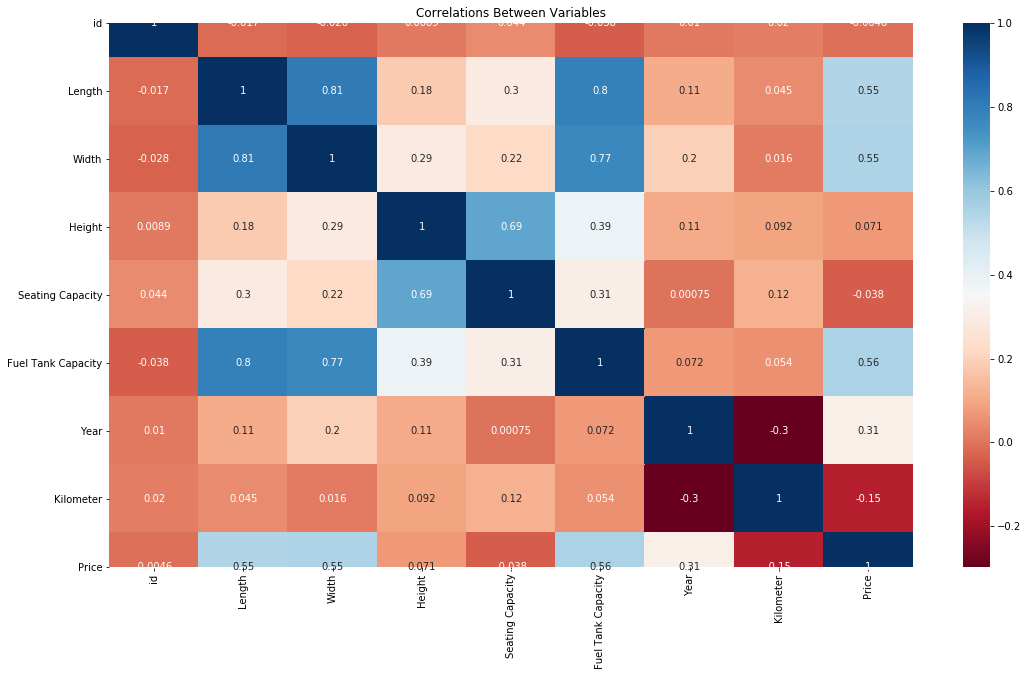

In [40]:
#correlation matrix
plt.figure(figsize=(18,10))
sns.heatmap(data.corr(),annot=True, cmap="RdBu")
plt.title("Correlations Between Variables")
plt.show() #'RdBu' says take red to blue and having white in the middle , Red is negatively correlated and Blue is positively correlated

DATA VISUALIZATION

In [41]:
def scatter(data, column):
    plt.figure()
    plt.scatter(data[column], data['Price'])
    plt.ylabel('Price')
    plt.xlabel(column)
    plt.grid(True)


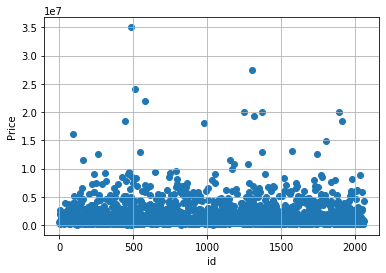

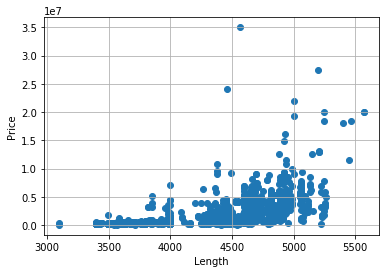

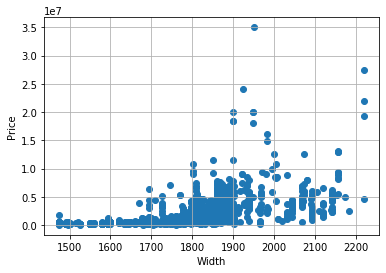

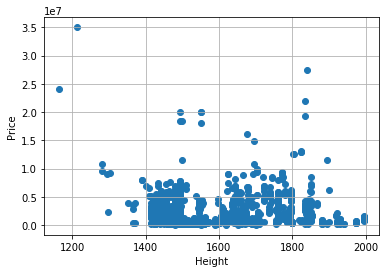

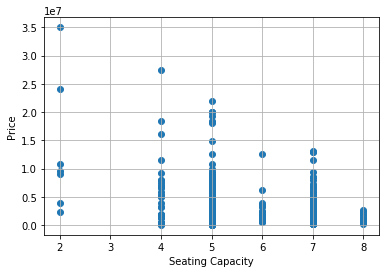

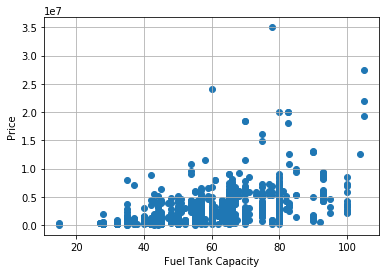

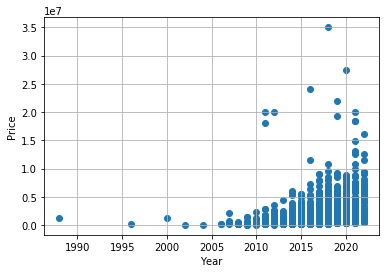

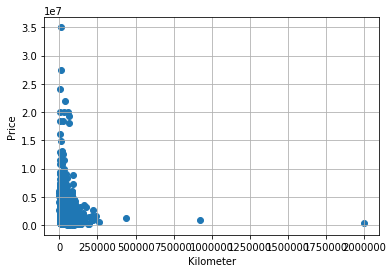

In [42]:
scatter(data, 'id')
scatter(data, 'Length')
scatter(data, 'Width')
scatter(data, 'Height')
scatter(data, 'Seating Capacity')
scatter(data, 'Fuel Tank Capacity')
scatter(data, 'Year')
scatter(data, 'Kilometer')

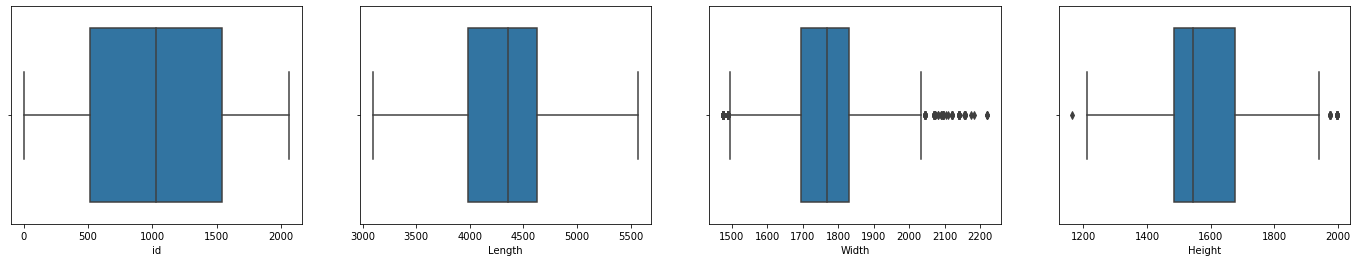

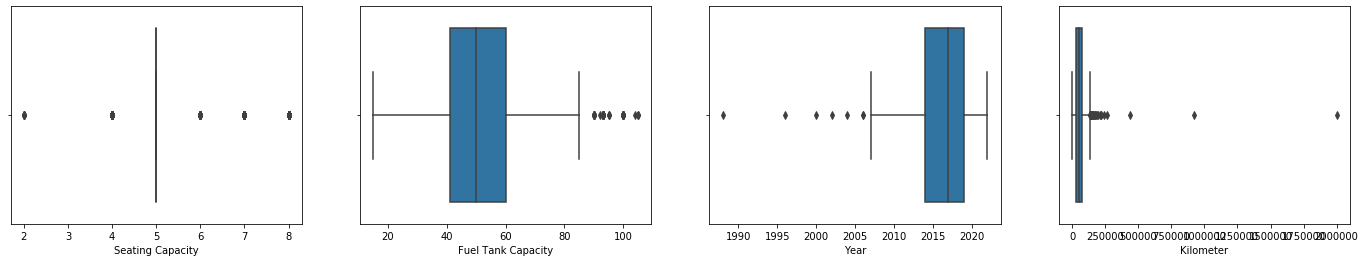

In [43]:
plt.figure(figsize = (24,4))
plt.subplot(1,4,1)
sns.boxplot(data['id'])
plt.subplot(1,4,2)
sns.boxplot(data['Length'])
plt.subplot(1,4,3)
sns.boxplot(data['Width'])
plt.subplot(1,4,4)
sns.boxplot(data['Height'])
plt.show()
plt.figure(figsize = (24,4))
plt.subplot(1,4,1)
sns.boxplot(data['Seating Capacity'])
plt.subplot(1,4,2)
sns.boxplot(data['Fuel Tank Capacity'])
plt.subplot(1,4,3)
sns.boxplot(data['Year'])
plt.subplot(1,4,4)
sns.boxplot(data['Kilometer'])
plt.show()

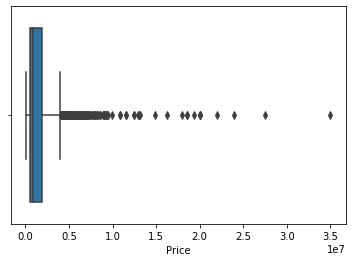

In [44]:
sns.boxplot(data['Price'])

In [45]:
data.columns

Index(['id', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain', 'Length',
       'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity', 'Make',
       'Model', 'Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Location',
       'Color', 'Owner', 'Seller Type', 'Price'],
      dtype='object')

In [46]:
data.nunique()

id                    2059
Engine                 108
Max Power              335
Max Torque             290
Drivetrain               3
Length                 248
Width                  170
Height                 196
Seating Capacity         6
Fuel Tank Capacity      55
Make                    33
Model                 1050
Year                    22
Kilometer              847
Fuel Type                9
Transmission             2
Location                77
Color                   17
Owner                    6
Seller Type              3
Price                  619
dtype: int64

In [47]:
data["Engine"].value_counts()

1197 cc    246
1248 cc    128
998 cc     127
1995 cc     85
1968 cc     84
          ... 
3902 cc      1
2835 cc      1
793 cc       1
5461 cc      1
1948 cc      1
Name: Engine, Length: 108, dtype: int64

In [48]:
# extract numerical values from 'Engine' column
data['Engine'] = data['Engine'].str.extract('(\d+)').astype(int)

In [49]:
data["Max Power"].value_counts()

89 bhp @ 4000 rpm     93
82 bhp @ 6000 rpm     65
83 bhp @ 6000 rpm     59
126 bhp @ 4000 rpm    57
74 bhp @ 4000 rpm     54
                      ..
165 bhp @ 3500 rpm     1
105 bhp @ 5250 rpm     1
100@5500               1
275 bhp @ 4000 rpm     1
137 bhp @ 3750 rpm     1
Name: Max Power, Length: 335, dtype: int64

In [50]:
# extract the numeric value from 'Max Power' column
data['Max Power Numeric'] = data['Max Power'].str.extract('(\d+\.?\d*)', expand=False).astype(float)

In [51]:
data["Max Torque"].value_counts()

200 Nm @ 1750 rpm    92
115 Nm @ 4000 rpm    83
114 Nm @ 4000 rpm    69
90 Nm @ 3500 rpm     67
400 Nm @ 1750 rpm    64
                     ..
205 Nm @ 1800 rpm     1
490 Nm @ 1800 rpm     1
380 Nm @ 2000 rpm     1
400 Nm @ 2000 rpm     1
319 Nm @ 1500 rpm     1
Name: Max Torque, Length: 290, dtype: int64

In [52]:
# extract the numeric value from 'Max Torque' column
data['Max Torque Numeric'] = data['Max Torque'].str.extract('(\d+\.?\d*)', expand=False).astype(float)

In [53]:
data_num=data._get_numeric_data()
data_num.head()

,id,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Year,Kilometer,Price,Max Power Numeric,Max Torque Numeric
0,1,1198,3990.0,1680.0,1505.0,5.0,35.0,2017,87150,505000,87.0,109.0000
1,2,1248,3995.0,1695.0,1555.0,5.0,42.0,2014,75000,450000,74.0,190.0000
2,3,1197,3585.0,1595.0,1550.0,5.0,35.0,2011,67000,220000,79.0,112.7619
3,4,1197,3995.0,1745.0,1510.0,5.0,37.0,2019,37500,799000,82.0,113.0000
4,5,2393,4735.0,1830.0,1795.0,7.0,55.0,2018,69000,1950000,148.0,343.0000


In [54]:
# normalizing the numerical columns
data_num = (data_num - data_num.min()) / (data_num.max() - data_num.min())
data_num

,id,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Year,Kilometer,Price,Max Power Numeric,Max Torque Numeric
0,0.000000,0.096180,0.360729,0.275168,0.409639,0.500000,0.222222,0.852941,0.043575,0.013047,0.0832,0.083333
1,0.000486,0.104558,0.362753,0.295302,0.469880,0.500000,0.300000,0.764706,0.037500,0.011473,0.0624,0.193989
2,0.000972,0.096012,0.196761,0.161074,0.463855,0.500000,0.222222,0.676471,0.033500,0.004893,0.0704,0.088473
3,0.001458,0.096012,0.362753,0.362416,0.415663,0.500000,0.244444,0.911765,0.018750,0.021459,0.0752,0.088798
4,0.001944,0.296414,0.662348,0.476510,0.759036,0.833333,0.444444,0.882353,0.034500,0.054390,0.1808,0.403005
...,...,...,...,...,...,...,...,...,...,...,...,...
2054,0.998056,0.260556,0.601619,0.557047,0.746988,0.833333,0.611111,0.823529,0.045150,0.022918,0.1648,0.385246
2055,0.998542,0.031836,0.160324,0.100671,0.403614,0.500000,0.188889,0.764706,0.041500,0.006466,0.0320,0.036885
2056,0.999028,0.095845,0.281781,0.275168,0.315663,0.500000,0.333333,0.735294,0.036500,0.005465,0.0560,0.073770
2057,0.999514,0.229725,0.743725,0.527517,0.378313,0.500000,0.555556,0.882353,0.030237,0.121341,0.2448,0.480874


In [55]:
data["Drivetrain"].value_counts()

FWD    1425
RWD     341
AWD     293
Name: Drivetrain, dtype: int64

In [56]:
data["Make"].value_counts()

Maruti Suzuki    440
Hyundai          349
Mercedes-Benz    171
Honda            158
Toyota           132
Audi             127
BMW              121
Mahindra         119
Tata              57
Volkswagen        50
Ford              48
Renault           43
Skoda             40
Land Rover        33
Kia               23
Jeep              18
Jaguar            17
MG                17
Nissan            16
Volvo             16
Porsche           15
MINI              11
Datsun             8
Chevrolet          7
Lexus              6
Mitsubishi         4
Rolls-Royce        3
Ssangyong          3
Isuzu              2
Fiat               2
Lamborghini        1
Ferrari            1
Maserati           1
Name: Make, dtype: int64

In [57]:
data["Fuel Type"].value_counts()

Diesel          1049
Petrol           942
CNG               50
Electric           7
LPG                5
Hybrid             3
Petrol + CNG       1
CNG + CNG          1
Petrol + LPG       1
Name: Fuel Type, dtype: int64

In [58]:
data["Transmission"].value_counts()

Manual       1133
Automatic     926
Name: Transmission, dtype: int64

In [59]:
data["Location"].value_counts()

Mumbai              342
Delhi               307
Pune                144
Bangalore           132
Hyderabad           116
                   ... 
Faizabad              1
Pimpri-Chinchwad      1
Rohtak                1
Siliguri              1
Valsad                1
Name: Location, Length: 77, dtype: int64

In [60]:
data["Color"].value_counts()

White     802
Silver    285
Grey      220
Blue      190
Black     163
Red       154
Brown      82
Maroon     37
Gold       30
Bronze     28
Green      17
Orange     16
Others     12
Yellow      9
Beige       8
Purple      5
Pink        1
Name: Color, dtype: int64

In [61]:
data["Owner"].value_counts()

First               1619
Second               373
Third                 42
UnRegistered Car      21
Fourth                 3
4 or More              1
Name: Owner, dtype: int64

In [62]:
data["Seller Type"].value_counts()

Individual                 1997
Corporate                    57
Commercial Registration       5
Name: Seller Type, dtype: int64

In [63]:
data_cat =data[['Drivetrain','Make','Model','Fuel Type','Transmission','Location','Color','Owner','Seller Type']]
data_cat.shape

(2059, 9)

In [64]:
data_cat.columns

Index(['Drivetrain', 'Make', 'Model', 'Fuel Type', 'Transmission', 'Location',
       'Color', 'Owner', 'Seller Type'],
      dtype='object')

In [65]:
data_cat.head()

,Drivetrain,Make,Model,Fuel Type,Transmission,Location,Color,Owner,Seller Type
0,FWD,Honda,Amaze 1.2 VX i-VTEC,Petrol,Manual,Pune,Grey,First,Corporate
1,FWD,Maruti Suzuki,Swift DZire VDI,Diesel,Manual,Ludhiana,White,Second,Individual
2,FWD,Hyundai,i10 Magna 1.2 Kappa2,Petrol,Manual,Lucknow,Maroon,First,Individual
3,FWD,Toyota,Glanza G,Petrol,Manual,Mangalore,Red,First,Individual
4,RWD,Toyota,Innova 2.4 VX 7 STR [2016-2020],Diesel,Manual,Mumbai,Grey,First,Individual


In [66]:
data_cat.isnull().sum()

Drivetrain      0
Make            0
Model           0
Fuel Type       0
Transmission    0
Location        0
Color           0
Owner           0
Seller Type     0
dtype: int64

In [67]:
#dummification for categorical columns
g_d=pd.get_dummies(data_cat)

In [68]:
g_d.head()

,Drivetrain_AWD,Drivetrain_FWD,Drivetrain_RWD,Make_Audi,Make_BMW,Make_Chevrolet,Make_Datsun,Make_Ferrari,Make_Fiat,Make_Ford,...,Color_Yellow,Owner_4 or More,Owner_First,Owner_Fourth,Owner_Second,Owner_Third,Owner_UnRegistered Car,Seller Type_Commercial Registration,Seller Type_Corporate,Seller Type_Individual
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [69]:
data_num.columns

Index(['id', 'Engine', 'Length', 'Width', 'Height', 'Seating Capacity',
       'Fuel Tank Capacity', 'Year', 'Kilometer', 'Price', 'Max Power Numeric',
       'Max Torque Numeric'],
      dtype='object')

In [70]:
# concating the numerical column and updated categorical column 
data_final=pd.concat([g_d,data_num],axis=1)
data_final.head()

,Drivetrain_AWD,Drivetrain_FWD,Drivetrain_RWD,Make_Audi,Make_BMW,Make_Chevrolet,Make_Datsun,Make_Ferrari,Make_Fiat,Make_Ford,...,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Year,Kilometer,Price,Max Power Numeric,Max Torque Numeric
0,0,1,0,0,0,0,0,0,0,0,...,0.360729,0.275168,0.409639,0.500000,0.222222,0.852941,0.043575,0.013047,0.0832,0.083333
1,0,1,0,0,0,0,0,0,0,0,...,0.362753,0.295302,0.469880,0.500000,0.300000,0.764706,0.037500,0.011473,0.0624,0.193989
2,0,1,0,0,0,0,0,0,0,0,...,0.196761,0.161074,0.463855,0.500000,0.222222,0.676471,0.033500,0.004893,0.0704,0.088473
3,0,1,0,0,0,0,0,0,0,0,...,0.362753,0.362416,0.415663,0.500000,0.244444,0.911765,0.018750,0.021459,0.0752,0.088798
4,0,0,1,0,0,0,0,0,0,0,...,0.662348,0.476510,0.759036,0.833333,0.444444,0.882353,0.034500,0.054390,0.1808,0.403005


In [71]:
data_final.shape

(2059, 1212)

In [72]:
data_final['Price']

0       0.013047
1       0.011473
2       0.004893
3       0.021459
4       0.054390
          ...   
2054    0.022918
2055    0.006466
2056    0.005465
2057    0.121341
2058    0.017768
Name: Price, Length: 2059, dtype: float64

Train and Test split

In [73]:
# importing neccessary libraries
from sklearn.model_selection import train_test_split

# splitting of data
X = data_final.drop(['Price'],axis=1)
y = data_final['Price']

In [74]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

MODEL BUILDING FROM SK-LEARN

In [75]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth = 5.5,random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5.5, random_state=42)

In [76]:
y_pred = rf.predict(X_train)

In [77]:
# Error Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.011196268733357356
Mean Squared Error: 0.0003832365417398513
Root Mean Squared Error: 0.01957642821711487
R-squared: 0.9115728841610092


In [78]:
rf.fit(X_test, y_test)
y_preds =rf.predict(X_test)

In [79]:
# Error Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae = mean_absolute_error(y_test, y_preds)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_preds)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.009252750712788345
Mean Squared Error: 0.00034904865080315477
Root Mean Squared Error: 0.018682843755787146
R-squared: 0.9403683224749506


MODEL BUILDING FROM SCRATCH

In [80]:
import numpy as np
import pandas as pd

class DecisionTreeRegressor: #which implements a decision tree regression algorithm
    def __init__(self, max_depth=2): # initialize the object's attributes
        self.max_depth = max_depth
    
    def fit(self, X, y): #X and y, which represent the input features and target values
        self.tree = self.build_tree(X, y, depth=0) # build_tree method to construct the decision tree using the input data and the specified max_depth
        
    def build_tree(self, X, y, depth):
        n_samples, n_features = X.shape # assigns samples and features to rows and columns 
        
        if depth == self.max_depth or n_samples == 5: #whether the maximum depth of the tree has been reached 
            return np.mean(y) #the method returns the mean of the target values, which will be used as the prediction for the leaf node.
        
        feature_idxs = np.random.choice(n_features, size=2, replace=False) #selects two random features from the input data without replacement and calls
        best_feature, best_threshold = self.find_best_split(X, y, feature_idxs) #find_best_split method to determine the best feature and threshold to split the data on
        
        if best_threshold is None: #it means that if no good split was found then return mean of target column
            return np.mean(y)
        
        left_idxs = X[:, best_feature] < best_threshold #indicate which samples in the input data should go to the left or right child node
        right_idxs = X[:, best_feature] >= best_threshold #based on whether their values for the best feature are less than or greater than or equal to the best threshold.
        
        left_tree = self.build_tree(X[left_idxs], y[left_idxs], depth+1) # recursively calls the build_tree method on the left and right subsets of the input data
        right_tree = self.build_tree(X[right_idxs], y[right_idxs], depth+1) #passing in the corresponding input and target values and increasing the depth by 1.
        
        return (best_feature, best_threshold, left_tree, right_tree)
        # the method returns a tuple containing the best feature, best threshold, and the left and right child nodes as subtrees
    
    def find_best_split(self, X, y, feature_idxs):
        best_score = float('inf') #creates a floating-point value that represents positive infinity
        best_feature = None #because it is used to keep track of the best found so far to split the data on
        best_threshold = None
        
        for feature in feature_idxs: # code loops over each feature in feature_idxs
            thresholds = np.unique(X[:, feature]) # loops over each unique threshold value for that feature
            
            for threshold in thresholds: # boolean index arrays are created to indicate which samples in the input data should go to which side
                left_idxs = X[:, feature] < threshold
                right_idxs = X[:, feature] >= threshold
                
                if np.sum(left_idxs) == 0 or np.sum(right_idxs) == 0: #checks whether there are any samples in either the left or right child node
                    continue
                
                score = self.split_score(y, y[left_idxs], y[right_idxs])
                
                if score < best_score: # if split_score is better than best score,feature,.. found, then it is updated otherwise previous best is kept
                    best_score = score
                    best_feature = feature
                    best_threshold = threshold
                    
        return best_feature, best_threshold # returns best values
    
    def split_score(self, y, y_left, y_right): # calculates the score for splitting the y target variable into two subgroups y_left and y_right
        p_left = len(y_left) / len(y) # calculates the proportion of instances in y_left compared to the total number of instances in y
        p_right = len(y_right) / len(y)
        
        score = p_left * np.var(y_left) + p_right * np.var(y_right) # calculates the score for splitting y into y_left and y_right
        # np.var() function calculates the variance of an array
        return score
    
    def predict(self, X):
        return np.array([self.traverse_tree(x, self.tree) for x in X])
    
    def traverse_tree(self, x, node):
        if isinstance(node, float):
            return node
        
        feature, threshold, left_tree, right_tree = node
        
        if x[feature] < threshold:
            if isinstance(left_tree,float):
                return left_tree
            else:
                return self.traverse_tree(x, right_tree)
        else:
            if isinstance(right_tree,float):
                return right_tree
            else:
                return self.traverse_tree(x,right_tree)
        
class RandomForestRegressor:
    def __init__(self, n_trees=15, max_depth=2, subsample_size=0.5):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.subsample_size = subsample_size
        self.trees = []
        
    def fit(self, X, y):
        for i in range(self.n_trees):
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            n_samples = len(X)
            subsample_size = int(self.subsample_size * n_samples)
            subsample_idxs = np.random.choice(range(n_samples), size=subsample_size, replace=True)
            X_sub = X.iloc[subsample_idxs]
            y_sub = y.iloc[subsample_idxs]
            tree.fit(X_sub.values, y_sub.values)
            #tree.fit(X[subsample_idxs], y[subsample_idxs])
            self.trees.append(tree)
            
    def predict(self, X):
        if isinstance(X, (int, float)):
            X = np.array([[X]])
        elif isinstance(X, pd.Series):
            X = X.values.reshape(1, n_features)
        else:
            X = X.values
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(predictions, axis=0)

In [81]:
rf = RandomForestRegressor(n_trees=15, max_depth=2, subsample_size=0.5)
rf.fit(X_train, y_train)
# Use the KNeighborsRegressor to make predictions on the train data
y_predic = rf.predict(X_train)

In [83]:
import numpy as np

def mean_absolute_error(y_train, y_predic):
    return np.mean(np.abs(y_train - y_predic))

def mean_squared_error(y_train, y_predic):
    return np.mean((y_train - y_predic)**2)

def root_mean_squared_error(y_train, y_predic):
    return np.sqrt(mean_squared_error(y_train, y_predic))

def r2_score(y_train, y_predic):
    ssr = np.sum((y_train - y_predic)**2)
    sst = np.sum((y_train - np.mean(y_train))**2)
    return 1 - (ssr / sst)

# Assuming y_true and y_pred are NumPy arrays or Pandas Series
mae = mean_absolute_error(y_train, y_predic)
mse = mean_squared_error(y_train, y_predic)
rmse = root_mean_squared_error(y_train, y_predic)
r2 = r2_score(y_train, y_predic)

print("Mean Absolute Error:",mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.03557499574933376
Mean Squared Error: 0.004513894730908464
Root Mean Squared Error: 0.06718552471260802
R-squared: -0.04152566047839157


In [84]:
rf = RandomForestRegressor(n_trees=15, max_depth=2, subsample_size=0.5)
rf.fit(X_test, y_test)
y_prediction= rf.predict(X_test)

In [85]:
import numpy as np

def mean_absolute_error(y_test, y_prediction):
    return np.mean(np.abs(y_test - y_prediction))

def mean_squared_error(y_test, y_prediction):
    return np.mean((y_test - y_prediction)**2)

def root_mean_squared_error(y_test, y_prediction):
    return np.sqrt(mean_squared_error(y_test, y_prediction))

def r2_score(y_test, y_prediction):
    ssr = np.sum((y_test - y_prediction)**2)
    sst = np.sum((y_test - np.mean(y_test))**2)
    return 1 - (ssr / sst)


# Assuming y_true and y_pred are NumPy arrays or Pandas Series
mae = mean_absolute_error(y_test, y_prediction)
mse = mean_squared_error(y_test, y_prediction)
rmse = root_mean_squared_error(y_test, y_prediction)
r2 = r2_score(y_test, y_prediction)

print("Mean Absolute Error:",mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.04195785628145614
Mean Squared Error: 0.0058395139938545605
Root Mean Squared Error: 0.07641671279147356
R-squared: 0.0023739825858073438
